In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import io
from tools import noise_apply, ridge_merge

## Synethetic Video

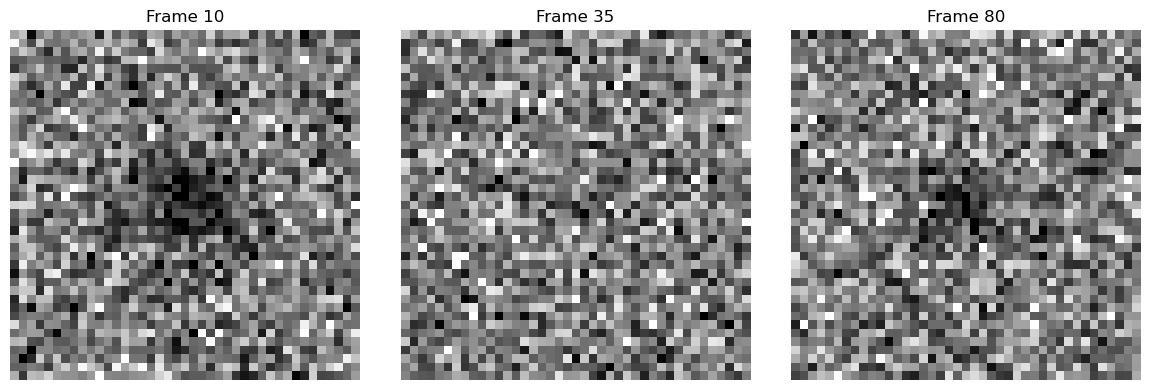

In [2]:
height = 41; width = 41; times = 100;
image_clean = np.zeros((height, width, times))

mu = 139; sd = 35

def ridge(t):
    return (height//2, width//2, t)

def Amp(t):
    if t < 20: return 60
    elif t >= 55 and t < 65: return 0
    else: return 30 + 30 * np.cos(t * math.pi / 5)

for t in range(times):
    x, y, _ = ridge(t)
    sigma_sq = 2 * (6 + 3*np.sin(t)) ** 2
    for i in range(height):
        for j in range(width):
            rad_sq = (i - x)**2 + (j - y)**2
            image_clean[i,j,t] = 140 - np.exp( - rad_sq / sigma_sq) * Amp(t)

image_noisy = noise_apply(image_clean, 139, 35, 'p')

frames = [10, 35, 80]
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
axs = axs.flatten()
for i in range(3):
    # axs[i].figure(figsize = (3.56,3.56))
    axs[i].imshow(image_noisy[:,:,frames[i]], cmap = plt.cm.gray, vmin = 60, vmax = 220)
    axs[i].set_title('Frame ' + str(frames[i]))
    axs[i].axis('off')



In [3]:
sigmas = [5,6,7]; deltas = [1,2,4]; mode = 'nearest'; edge = 9
ridge_fit = ridge_merge(image_noisy, sigmas, deltas, edge, mode)

## Simulated TEM Images

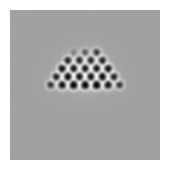

In [4]:
tem_clean = io.imread('data/simulated_CeO2.tif')
tem_clean = np.array(tem_clean)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(tem_clean, cmap = plt.cm.gray)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

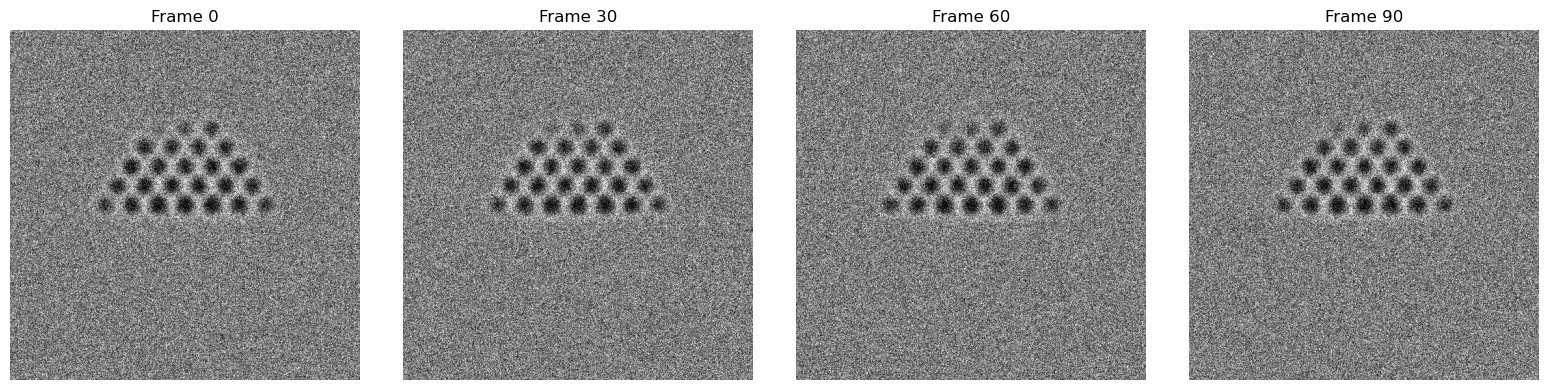

In [5]:
tem_noisy = np.repeat(tem_clean[...,None], times, axis = -1)
tem_noisy = noise_apply(tem_noisy, mu, sd, 'p')

frames = [0, 30, 60, 90]
fig, axs = plt.subplots(1, 4, figsize=(16, 4), tight_layout=True)
axs = axs.flatten()
for i in range(4):
    # axs[i].figure(figsize = (3.56,3.56))
    axs[i].imshow(tem_noisy[:,:,frames[i]], cmap = plt.cm.gray, vmin = 60, vmax = 220)
    axs[i].set_title('Frame ' + str(frames[i]))
    axs[i].axis('off')

#### Labels of Atomic Columns
![](imgs/simu_config.png)

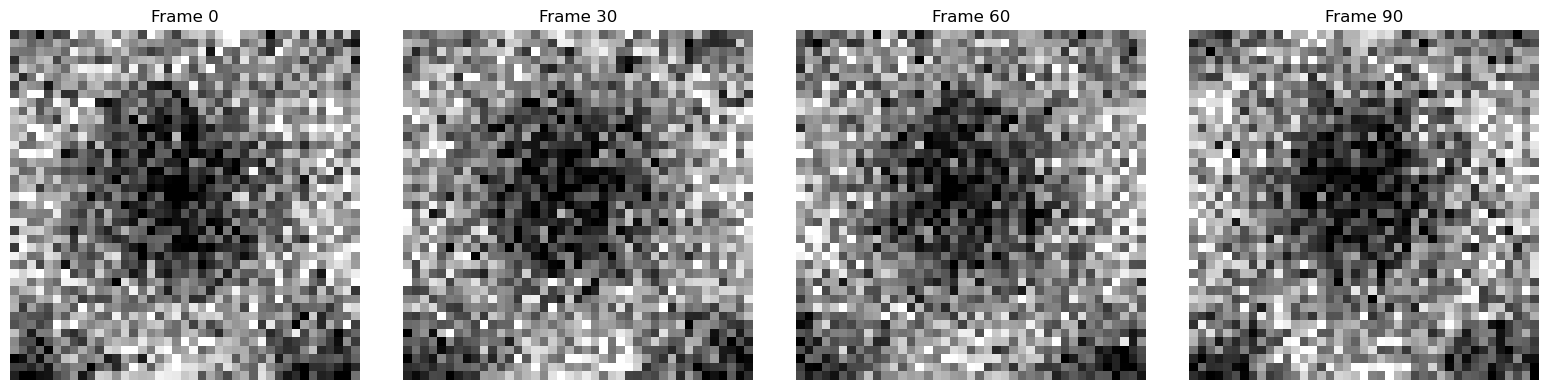

In [6]:
## For atomic column 16
x_ref = 257.00000; y_ref = 201.00000
height_crop = 41; width_crop = 41

cropped_image = tem_noisy[round(y_ref-height_crop//2):round(y_ref+1+height_crop//2),
                          round(x_ref-width_crop//2):round(x_ref+1+width_crop//2),:]

frames = [0, 30, 60, 90]
fig, axs = plt.subplots(1, 4, figsize=(16, 4), tight_layout=True)
axs = axs.flatten()
for i in range(4):
    # axs[i].figure(figsize = (3.56,3.56))
    axs[i].imshow(cropped_image[:,:,frames[i]], cmap = plt.cm.gray, vmin = 60, vmax = 220)
    axs[i].set_title('Frame ' + str(frames[i]))
    axs[i].axis('off')



In [7]:
sigmas = [4,5,6,7,8]; deltas = [.5,1]; edge = 5; mode = 'nearest'
tem_fit = ridge_merge(cropped_image, sigmas = sigmas, deltas = deltas, edge = edge, mode = mode)

Text(0.5, 0, 'Frame')

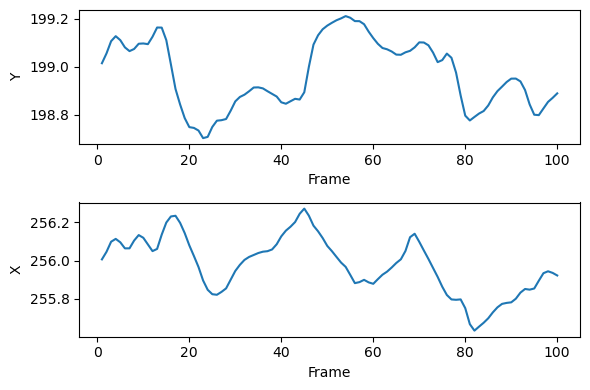

In [8]:
ridge_curve = np.array([tem_fit['curve'](j, 1) for j in range(times)])
ridge_curve[:,:3] += np.array([round(y_ref-height_crop//2) + edge, round(x_ref-width_crop//2) + edge, 1])[None,...]

fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
axs = axs.flatten()
axs[0].plot(ridge_curve[:,2], ridge_curve[:,0])
axs[0].set_ylabel('Y')
axs[0].set_xlabel('Frame')
axs[1].plot(ridge_curve[:,2], ridge_curve[:,1])
axs[1].set_ylabel('X')
axs[1].set_xlabel('Frame')
